# Get all data files from data dir

In [1]:
%%bash
# Grab straight from GitHub
git clone --depth=1 https://github.com/MassBank/MassBank-data.git 
data_dir=./MassBank-data
find $data_dir -name MSBNK*.txt -exec grep -Lr 'DEPRECATED:' {} \+ > file_list.tmp
head -n10 file_list.tmp
echo Found `cat file_list.tmp | wc -l` record files


/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00006.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00115.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00396.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00485.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00483.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00817.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00800.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00273.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00102.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00116.txt
Found 123652 record files


# Get all 'DATES' from files

In [2]:
%%bash
xargs -n 1000 -d '\n' -a file_list.tmp grep -h 'DATE:' | awk '{print $2}' > dates.tmp
echo Found `cat dates.tmp | wc -l` dates

Found 123652 dates


# Sort and count dates

In [3]:
%%bash
sort dates.tmp | uniq -c > dates_sorted.tmp
echo Found `cat dates_sorted.tmp | wc -l` sorted and counted dates

Found 366 sorted and counted dates


# Make a graph

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
            cummulated records
date                          
2006-04-19                  31
2006-04-20                  53
2006-04-21                  63
2006-04-24                  68
2006-04-26                  81
...                        ...
2024-11-15              102937
2024-11-18              102946
2024-12-10              102977
2025-01-17              123635
2025-02-07              123652

[366 rows x 1 columns]


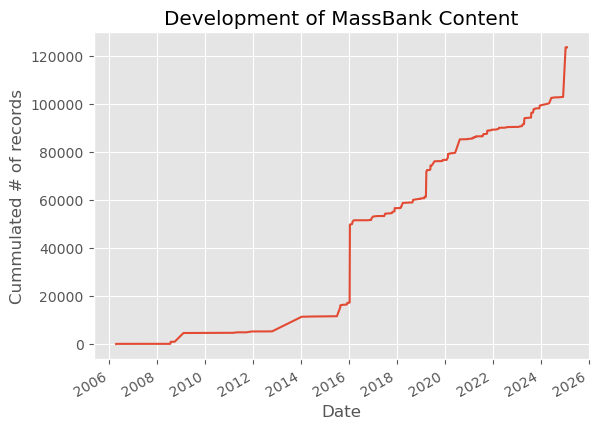

In [5]:
import pandas as pd
import datetime
import csv
import os
import matplotlib.pyplot as plt

print(plt.style.available)


#outPath='casmi2017/parameters'
#if not os.path.exists(outPath):
#    os.makedirs(outPath)

dates = pd.read_csv("dates_sorted.tmp", names=['count', 'date'], sep=r'\s+')
dates["date"] = pd.to_datetime(dates["date"], format="%Y.%m.%d" )
#df[2] = pd.to_datetime(df[2])

#dates.cumsum()
dates["cummulated records"] = dates["count"].cumsum()
dates = dates[["date", "cummulated records"]]
dates = dates.set_index('date')
print(dates)
plt.style.use('ggplot')
plot = dates.plot(xlabel='Date', ylabel='Cummulated # of records', title='Development of MassBank Content', legend=False)
plot.savefig("massbank_development.png", dpi=300, bbox_inches='tight')



# MassBank-data GitHub metrics
Obtain the number of e.g. forks and stars for the MassBank-data repository. For development over time, store data with timestamp.

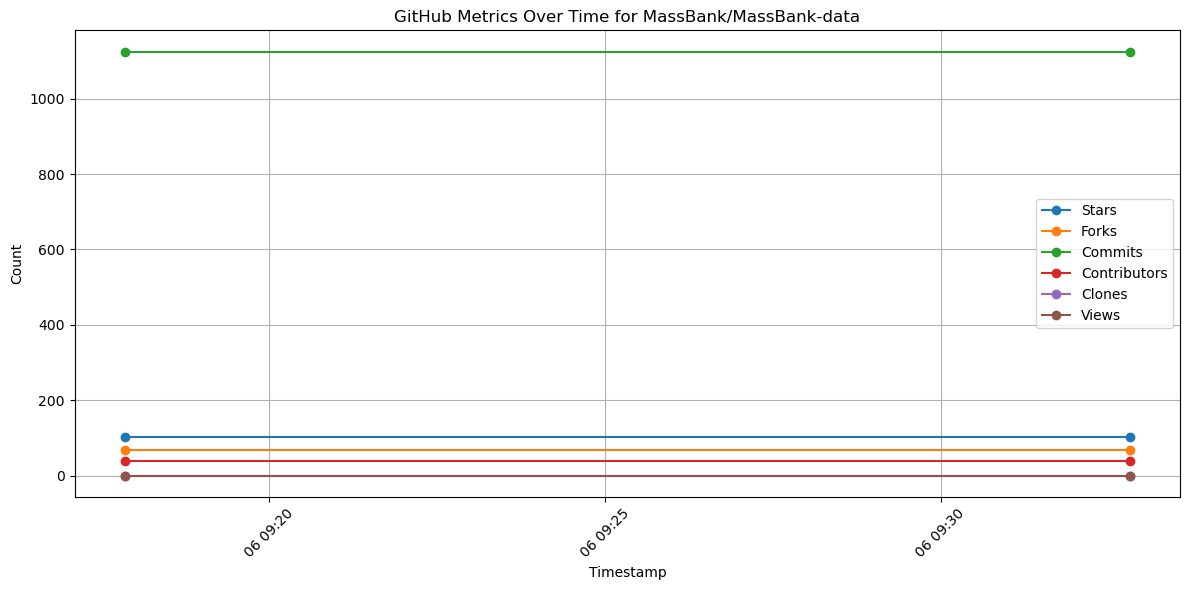

In [5]:
import requests
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Read GitHub token from local file
with open("github_token.txt", "r") as f:
    token = f.read().strip()

# GitHub repository info
owner = "MassBank"
repo = "MassBank-data"
headers = {
    "Accept": "application/vnd.github+json",
    "Authorization": f"Bearer {token}"
}

# CSV file
csv_file = "repo_metrics.csv"
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Fetch basic repo info
repo_url = f"https://api.github.com/repos/{owner}/{repo}"
repo_data = requests.get(repo_url, headers=headers).json()
stars = repo_data.get("stargazers_count", 0)
forks = repo_data.get("forks_count", 0)

# Count commits
commits_url = f"https://api.github.com/repos/{owner}/{repo}/commits?per_page=1"
commits_resp = requests.get(commits_url, headers=headers)
if "Link" in commits_resp.headers:
    try:
        commits = int(commits_resp.headers["Link"].split("page=")[-1].split(">")[0])
    except:
        commits = 1
else:
    commits = len(commits_resp.json())

# Count contributors
contributors_url = f"https://api.github.com/repos/{owner}/{repo}/contributors?per_page=1&anon=true"
contributors_resp = requests.get(contributors_url, headers=headers)
if "Link" in contributors_resp.headers:
    try:
        contributors = int(contributors_resp.headers["Link"].split("page=")[-1].split(">")[0])
    except:
        contributors = len(contributors_resp.json())
else:
    contributors = len(contributors_resp.json())

# Clones
clones_url = f"https://api.github.com/repos/{owner}/{repo}/traffic/clones"
clones_data = requests.get(clones_url, headers=headers).json()
clones = clones_data.get("count", 0)
unique_clones = clones_data.get("uniques", 0)

# Visitors
views_url = f"https://api.github.com/repos/{owner}/{repo}/traffic/views"
views_data = requests.get(views_url, headers=headers).json()
views = views_data.get("count", 0)
unique_views = views_data.get("uniques", 0)

# Append to CSV
file_exists = os.path.isfile(csv_file)
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(["Timestamp", "Stars", "Forks", "Commits", "Contributors", "Clones", "Unique Clones", "Views", "Unique Views"])
    writer.writerow([timestamp, stars, forks, commits, contributors, clones, unique_clones, views, unique_views])

# Plotting
df = pd.read_csv(csv_file)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

plt.figure(figsize=(12, 6))
for column in ["Stars", "Forks", "Commits", "Contributors", "Clones", "Views"]:
    plt.plot(df["Timestamp"], df[column], label=column, marker='o')

plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.title(f"GitHub Metrics Over Time for {owner}/{repo}")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


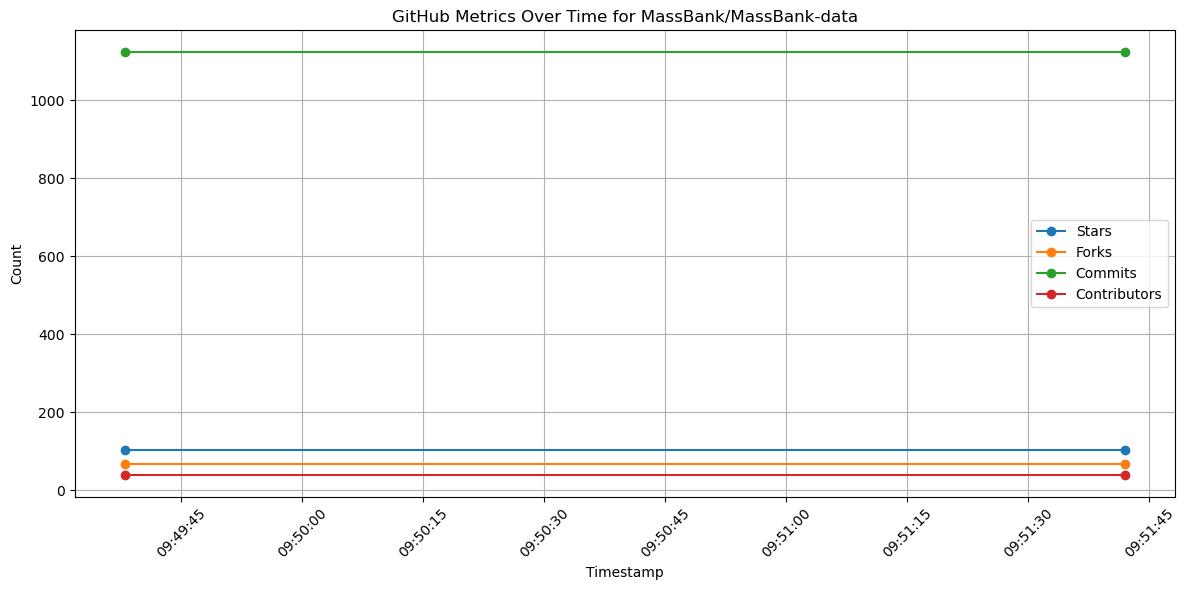

In [10]:
import requests
import csv
import os
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

# Read GitHub token from local file
with open("github_token.txt", "r") as f:
    token = f.read().strip()

# GitHub repository info
owner = "MassBank"
repo = "MassBank-data"
headers = {
    "Accept": "application/vnd.github+json",
    "Authorization": f"Bearer {token}"
}

# CSV file
csv_file = "data/repo_metrics.csv"
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Fetch basic repo info
repo_url = f"https://api.github.com/repos/{owner}/{repo}"
repo_data = requests.get(repo_url, headers=headers).json()
stars = repo_data.get("stargazers_count", 0)
forks = repo_data.get("forks_count", 0)

# Count commits
commits_url = f"https://api.github.com/repos/{owner}/{repo}/commits?per_page=1"
commits_resp = requests.get(commits_url, headers=headers)
if "Link" in commits_resp.headers:
    try:
        commits = int(commits_resp.headers["Link"].split("page=")[-1].split(">")[0])
    except:
        commits = 1
else:
    commits = len(commits_resp.json())

# Count contributors
contributors_url = f"https://api.github.com/repos/{owner}/{repo}/contributors?per_page=1&anon=true"
contributors_resp = requests.get(contributors_url, headers=headers)
if "Link" in contributors_resp.headers:
    try:
        contributors = int(contributors_resp.headers["Link"].split("page=")[-1].split(">")[0])
    except:
        contributors = len(contributors_resp.json())
else:
    contributors = len(contributors_resp.json())

# Append to CSV
file_exists = os.path.isfile(csv_file)
with open(csv_file, mode='a', newline='') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(["Timestamp", "Stars", "Forks", "Commits", "Contributors"])
    writer.writerow([timestamp, stars, forks, commits, contributors])

# Plotting
df = pd.read_csv(csv_file)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

plt.figure(figsize=(12, 6))
for column in ["Stars", "Forks", "Commits", "Contributors"]:
    plt.plot(df["Timestamp"], df[column], label=column, marker='o')

plt.xlabel("Timestamp")
plt.ylabel("Count")
plt.title(f"GitHub Metrics Over Time for {owner}/{repo}")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
